# Natural Language Processing(NLP) Project on Resume Screening with Python.

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. In this article, I will introduce you to a machine learning project on Resume Screening with Python programming language.

**What is Resume Screening?**

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
import pandas as pd

od.download(
	"https://www.kaggle.com/datasets/dhainjeamita/updatedresumedataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rameshdkoppad
Your Kaggle Key: ··········


100%|██████████| 383k/383k [00:00<00:00, 52.0MB/s]

In [4]:
import pandas as pd

# reading the CSV file
file =('updatedresumedataset/\
UpdatedResumeDataSet.csv')
resumeDataset = pd.read_csv(file, encoding = 'utf-8')
resumeDataset['cleaned_resume'] = ''
resumeDataset

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [5]:
# displaying the contents of the XLSX file
resumeDataset.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


### Categories of resumes present in the dataset

In [6]:
print("Display the distinct categories of resume - ")
print(resumeDataset['Category'].unique())

Display the distinct categories of resume - 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


### Distinct categories of resume and the number of records belonging to each category

In [7]:
print("Display the distinct categories of resume - ")
print(resumeDataset['Category'].value_counts())

Display the distinct categories of resume - 
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


### Visualize the number of categories in the dataset

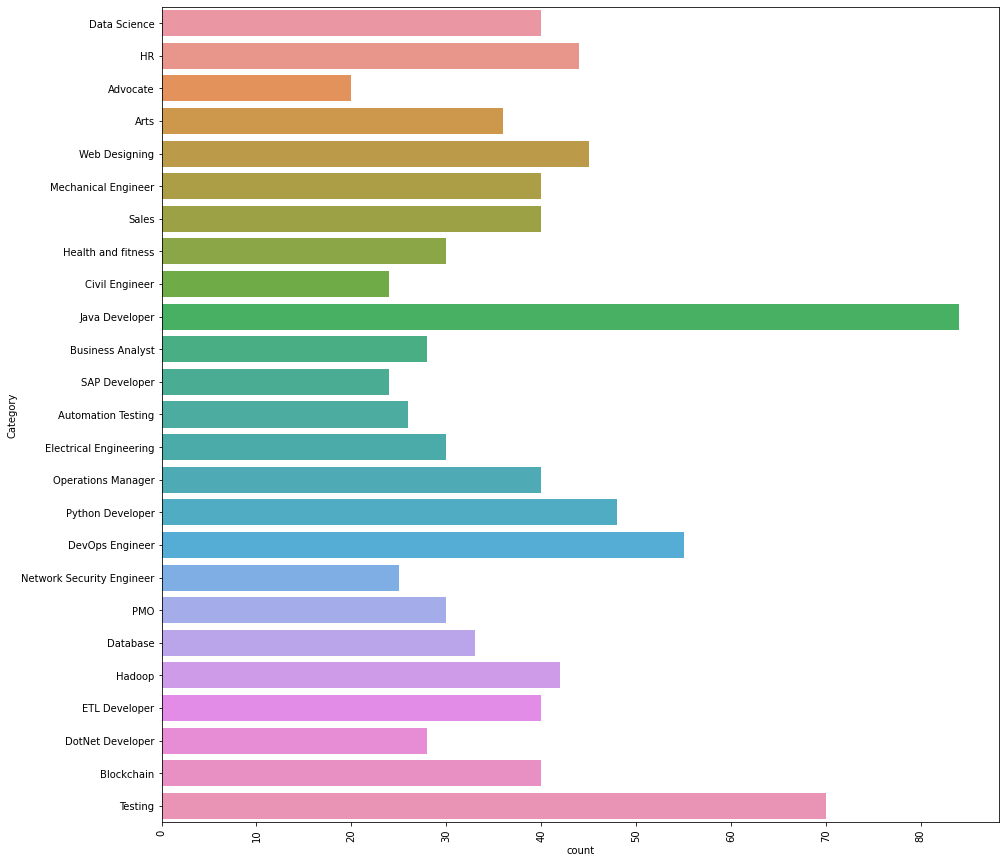

In [8]:
import seaborn as sns
plt.figure(figsize=(15, 15))
plt.xticks(rotation = 90)
sns.countplot(y = "Category", data = resumeDataset)

### Visualize the distribution of categories

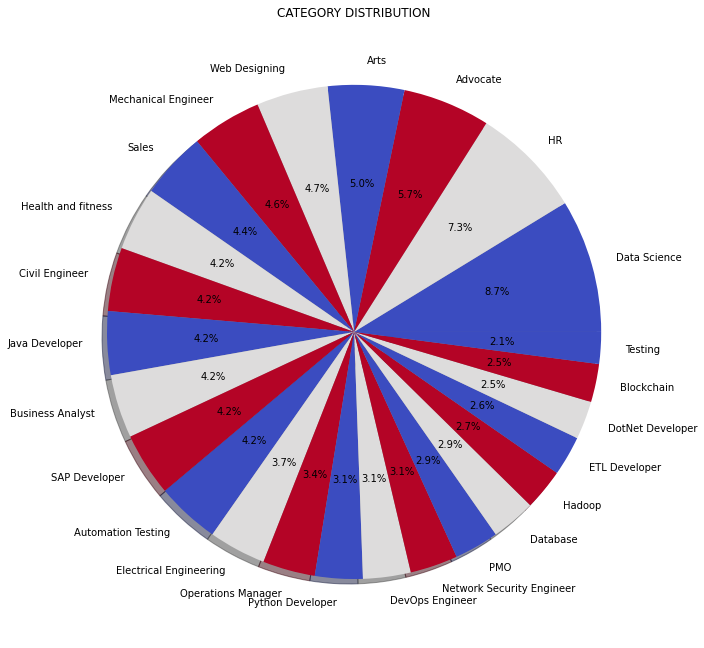

In [9]:
from matplotlib.gridspec import GridSpec

targetCounts = resumeDataset['Category'].value_counts()
targetLabels = resumeDataset['Category'].unique()

# Make Square Figures and Axes
plt.figure(1, figsize=(25, 25))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect = 1, title = 'CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels = targetLabels, autopct = '%1.1f%%', shadow = True, colors = colors)
plt.show()

### Create helper function to remove the URLs, hashtags, mentions, special letters, and punctuations

In [10]:
import re
def cleanResume(resumeText):
  resumeText = re.sub('http\S+\s*', ' ', resumeText) # remove URLs
  resumeText = re.sub('RT|cc', ' ', resumeText) # remove RT and cc
  resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
  resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
  resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
  resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
  resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
  return resumeText

resumeDataset['cleaned_resume'] = resumeDataset.Resume.apply(lambda x: cleanResume(x))

### Now as we have cleared the dataset, the next task is to have a look at the Wordcloud. A Wordcloud represents the most numbers of words larger and vice versa

In [11]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


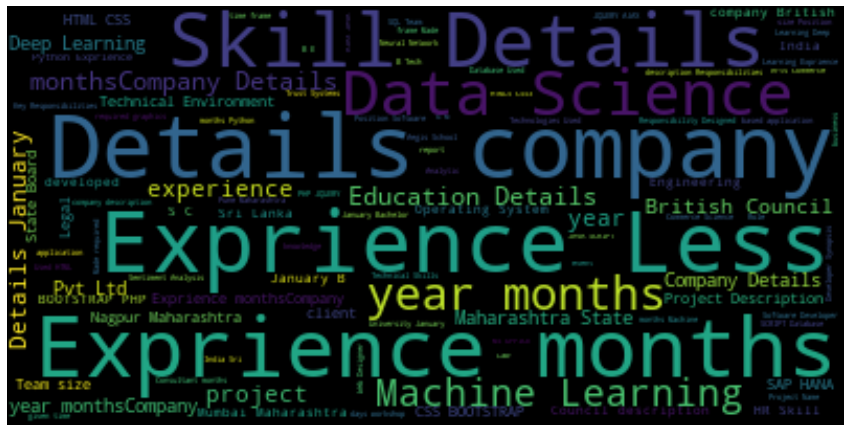

In [12]:
oneSetOfStopWords = set(stopwords.words('english') + ['``', "''"])
totalWords = []
Sentences = resumeDataset['Resume'].values
cleanedSentences = ""
for i in range(0, 160):
  cleanedText = cleanResume(Sentences[i])
  cleanedSentences += cleanedText
  requiredWords = nltk.word_tokenize(cleanedText)
  for word in requiredWords:
    if word not in oneSetOfStopWords and word not in string.punctuation:
      totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Convert these words into categorical values

In [13]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataset[i] = le.fit_transform(resumeDataset[i])

### Training Machine Learning Model for Resume Screening

Now the next step in the process is to train a model for the task of Resume Screening. Here I will use the one vs the rest classifier; KNeighborsClassifier. For this task, I will first split the data into training and test sets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [17]:
requiredText = resumeDataset['cleaned_resume'].values
requiredTarget = resumeDataset['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english',
    max_features = 1500)

word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print("feature Completed .....")

X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state = 0, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

feature Completed .....
(769, 1500)
(193, 1500)


Now let’s train the model and print the classification report:

In [18]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on Training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on Test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s: \n %s \n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on Training set: 0.99
Accuracy of KNeighbors Classifier on Test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      